In [45]:
import jax.numpy as jnp
import jax.random as jrandom
import numpy as np
from jax import grad
from jax import jit, grad, jacfwd, jacrev
import math


import scipy 

import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = [15,15]
plt.style.use('default')
plt.rcParams['lines.markersize'] = 8
plt.rcParams.update({'font.size': 12})


from tqdm import tqdm
import time

from jax.config import config
config.update("jax_enable_x64", True)

import sys
sys.path.append("..")

from Ours import Ours
from FD import FD
from Functions import Quadratic, PyCutestGetter

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
def get_mc_loss(F, x_0, num_runs):
    g_F = F.f1(x_0)
    H = F.f2(x_0)
    def helper(grad_getter, jrandom_key):
        errs = []
        for _ in range(num_runs):
            jrandom_key, subkey = jrandom.split(jrandom_key)
            sgd = grad_getter.grad(F, x_0, subkey, H=H)[0]
            errs.append(float(jnp.linalg.norm(sgd - g_F)**2))
        errs = jnp.array(errs)
        return jnp.mean(errs), jnp.std(errs), jnp.percentile(errs, 25), jnp.percentile(errs, 75)
    return helper

In [52]:
sig = 0.1

# res_our = []
# res_fd = []
# res_cfd = []

hs = [0.001, 0.01, 0.1, 1]

jrandom_key = jrandom.PRNGKey(0)

num_samples = 3

num_f = 73 + 1

fi = 0
c = 0
while True:
    print(fi)
    di = 0
    while True:
        jrandom_key, subkey = jrandom.split(jrandom_key)
        
        func_name, x_0, F = PyCutestGetter(func_i=fi, dim_i=di, sig=sig, noise_type="gaussian")
        if func_name is None:
            break
            
        l = get_mc_loss(F, x_0, num_samples)
        
#         res_our.append([])
#         res_fd.append([])
#         res_cfd.append([])
#         for h in hs:
            
#             S_ours = Ours(sig, max_h=h)
#             S_FD = FD(sig, is_central=False, h=h, use_H=True)
#             S_CFD = FD(sig, is_central=True, h=h, use_H=False)


#             res_our[-1].append(l(S_ours, subkey))
#             res_fd[-1].append(l(S_FD, subkey))
#             res_cfd[-1].append(l(S_CFD, subkey))
            
        if c in [ 15,  24, 141,  13,  86,  12, 140, 134, 122,  40,  52,  50,
             123,  61, 114, 133,  37,  41,  18,  53]:
            print(func_name)
            print(fi)
            print(di)
        di += 1
        c += 1

    if func_name is None and di == 0:
        break
    
    fi += 1
    
res_our = jnp.array(res_our)
res_fd = jnp.array(res_fd)
res_cfd = jnp.array(res_cfd)
        

0
1
2
3
4
5
6
7
8
9
10
11
BROWNAL
11
1
BROWNAL
11
2
12
13
CLIFF
13
0
14
CRAGGLVY
14
2
15
16
17
18
19
DENSCHND
19
0
20
21
22
23
24
25
DIXMAAND
25
1
26
DIXMAANE
26
1
DIXMAANE
26
2
27
28
29
DIXMAANH
29
2
30
DIXMAANI
30
1
DIXMAANI
30
2
31
32
33
DIXMAANL
33
1
34
35
36
37
38
39
40
41
42
43
44
GENROSE
44
2
45
46
47
48
49
50
51
52
53
54
55
56
57
58
PFIT1LS
58
0
59
60
61
62
63
64
SINQUAD
64
1
SINQUAD
64
2
65
66
67
68
TQUARTIC
68
2
TQUARTIC
68
3
69
70
WATSON
70
0
WATSON
70
1
71
72
73


<BarContainer object of 145 artists>

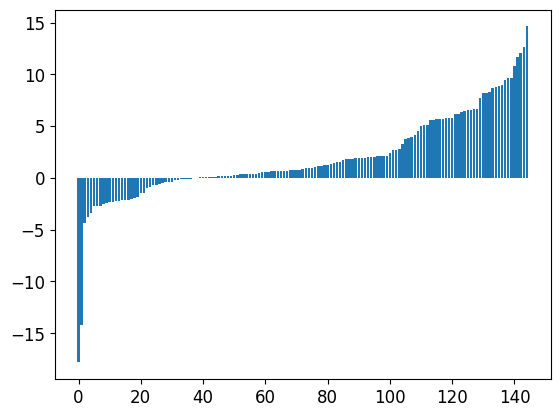

In [48]:
per_prf = jnp.sort(jnp.log(jnp.min(res_our[:, :, 0], axis=1) / jnp.min(res_cfd[:, :, 0], axis=1))/jnp.log(2))

plt.bar(range(len(per_prf)), per_prf)





<BarContainer object of 145 artists>

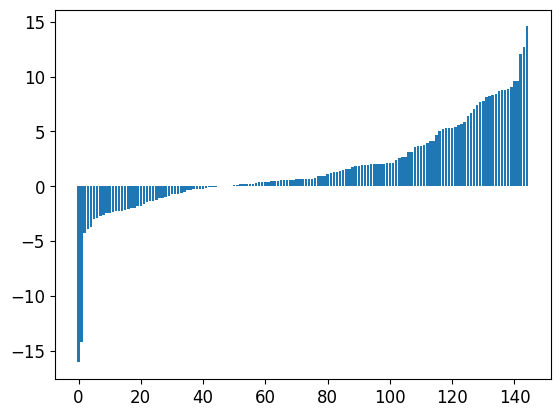

In [253]:
per_prf = jnp.sort(jnp.log(jnp.min(res_our[:, :, 0], axis=1) / jnp.min(res_cfd[:, :, 0], axis=1))/jnp.log(2))

plt.bar(range(len(per_prf)), per_prf)




<BarContainer object of 145 artists>

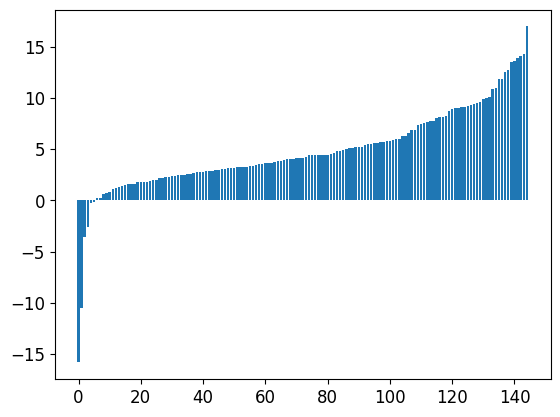

In [255]:
per_prf = jnp.sort(jnp.log(jnp.min(res_fd[:, :, 0], axis=1) / jnp.min(res_cfd[:, :, 0], axis=1))/jnp.log(2))

plt.bar(range(len(per_prf)), per_prf)





<BarContainer object of 145 artists>

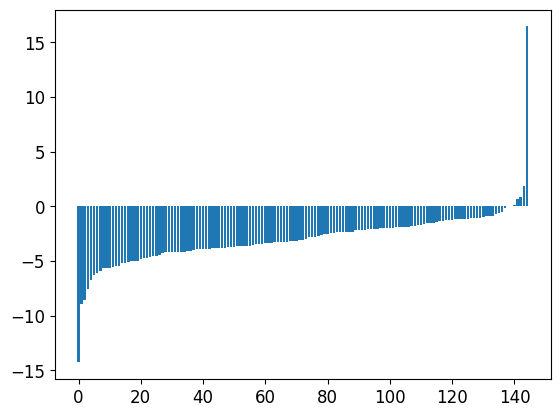

In [49]:
per_prf = jnp.sort(jnp.log(jnp.min(res_our[:, :, 0], axis=1) / jnp.min(res_fd[:, :, 0], axis=1))/jnp.log(2))

plt.bar(range(len(per_prf)), per_prf)




<BarContainer object of 145 artists>

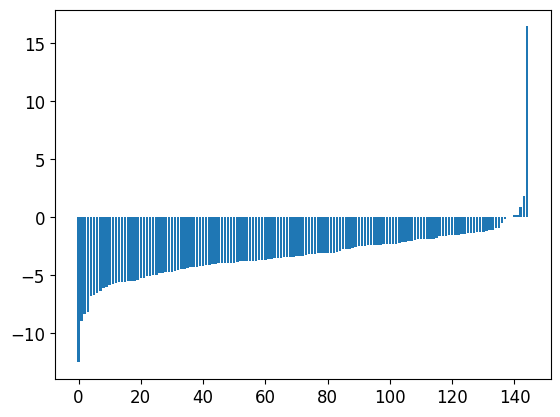

In [254]:
per_prf = jnp.sort(jnp.log(jnp.min(res_our[:, :, 0], axis=1) / jnp.min(res_fd[:, :, 0], axis=1))/jnp.log(2))

plt.bar(range(len(per_prf)), per_prf)



In [236]:
res_our[88]

DeviceArray([[ 449.94684596,   29.01724758,  431.40191924,  466.82289507],
             [3428.82480849,   16.26432281, 3418.48582451, 3438.3563105 ],
             [2799.50933379,    3.86653365, 2797.21919797, 2801.94774596]],            dtype=float64)

In [235]:
res_fd[88]

DeviceArray([[43.1762344 , 26.1164953 , 26.19601288, 57.95369797],
             [43.1762344 , 26.1164953 , 26.19601288, 57.95369797],
             [43.1762344 , 26.1164953 , 26.19601288, 57.95369797]],            dtype=float64)

In [51]:
jnp.argsort(jnp.log(jnp.min(res_our[:, :, 0], axis=1) / jnp.min(res_fd[:, :, 0], axis=1)))[:20]

DeviceArray([ 15,  24, 141,  13,  86,  12, 140, 134, 122,  40,  52,  50,
             123,  61, 114, 133,  37,  41,  18,  53], dtype=int64)

In [234]:
jnp.argsort(jnp.log(jnp.min(res_our[:, :, 0], axis=1) / jnp.min(res_fd[:, :, 0], axis=1)))[-10:]

DeviceArray([144, 111, 121,  21,  77,  76, 108,  91,  88,  89], dtype=int64)

In [208]:
jnp.argmax(jnp.log(jnp.min(res_our[:, :, 0], axis=1) / jnp.min(res_fd[:, :, 0], axis=1)))

DeviceArray(89, dtype=int64)

In [238]:
func_name, x_0, F = PyCutestGetter(func_i=46, dim_i=0, sig=sig, noise_type="gaussian")
func_name


'HAIRY'

In [247]:
h = 0.01
l = get_mc_loss(F, x_0, 3)


S_ours = Ours(sig, max_h=h)
S_FD = FD(sig, is_central=False, h=h, use_H=True)
S_CFD = FD(sig, is_central=True, h=h, use_H=False)


print("Our", l(S_ours, subkey)[0])
print("FD", l(S_FD, subkey)[0])
print("CFD", l(S_CFD, subkey)[0])

[0.0001 0.0001]
[-361.28044364  971.38977628]
[[ 0.00707107  0.00707107]
 [ 0.00707107 -0.00707107]]
[[-0.00103113 -0.0099467 ]
 [ 0.0099467  -0.00103113]]
[0.0001 0.0001]
[-361.28044364  971.38977628]
[[ 0.00707107  0.00707107]
 [ 0.00707107 -0.00707107]]
[[-0.00103113 -0.0099467 ]
 [ 0.0099467  -0.00103113]]
[0.0001 0.0001]
[-361.28044364  971.38977628]
[[ 0.00707107  0.00707107]
 [ 0.00707107 -0.00707107]]
[[-0.00103113 -0.0099467 ]
 [ 0.0099467  -0.00103113]]
Our 189.67195460648583
[[0.01 0.  ]
 [0.   0.01]]
[[0.01 0.  ]
 [0.   0.01]]
[[0.01 0.  ]
 [0.   0.01]]
FD 190.5004843336409
[[ 0.01  0.   -0.01 -0.  ]
 [ 0.    0.01 -0.   -0.01]]
[[ 0.01  0.   -0.01 -0.  ]
 [ 0.    0.01 -0.   -0.01]]
[[ 0.01  0.   -0.01 -0.  ]
 [ 0.    0.01 -0.   -0.01]]
CFD 155.17851937478844
